# Sentinel Hub Process API services from within Python

Er wordt gebruikt gemaakt van de Sentinel Hub Process API om onze  satellietbeelden te verzamelen.
Er wordt een request request gestuured naar sentinel Hub en we kunne dan met get_data() de data krijgen en printen via Python

In [1]:
from python_scripts.connector import *
from python_scripts.helper import *

Succefully connected!


In [2]:
from eval_scripts.evalscript_true_color import *
from eval_scripts.evalscript_forest import *
from eval_scripts.evalscript_ndvi import *
from eval_scripts.evalscript_ndvi_values import *

In [9]:
from sentinelhub.geo_utils import *
from sentinelhub.constants import CRS
from sentinelhub.geometry import BBox
import math 
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance

lng = 87.02194333333333
lat = 21.911076666666666
# lng, lat = to_wgs84(lng, lat, CRS.WGS84)
no_clouds = { 
    "dataFilter": { 
        "maxCloudCoverage": 0
    } 
}

## First method to convert center coordinates and scale/radius to bounding  box

In [ ]:
# degrees to radians
def deg2rad(degrees):
    return math.pi*degrees/180.0

def bbox_converter(long, lat, radius):

    # Calculating dy
    earth_radius = 6.371 * 10**3
    dy = 360 * (radius/earth_radius)
    # Calculating dx
    dx = dy * math.cos(deg2rad(long))
    
    return [long - dx, lat - dy, long + dx, lat + dy]

In [ ]:
bbox_1 = bbox_converter(lng, lat, 5000)
coords_1 = BBox(bbox_1, CRS.WGS84)
coords_1

In [ ]:
bbox_to_resolution(coords_1, 512, 512)

In [ ]:
img_true = simple_request(evalscript_true_color, coords_1, config, False, other_args=no_clouds)
im = Image.fromarray(img_true)
enhancer = ImageEnhance.Sharpness(im)
im_s_1 = enhancer.enhance(2)
im_s_1

## Second method

In [ ]:
# degrees to radians
def deg2rad(degrees):
    return math.pi*degrees/180.0
# radians to degrees
def rad2deg(radians):
    return 180.0*radians/math.pi

# Semi-axes of WGS-84 geoidal reference
WGS84_a = 6378137.0  # Major semiaxis [m]
WGS84_b = 6356752.3  # Minor semiaxis [m]

# Earth radius at a given latitude, according to the WGS-84 ellipsoid [m]
def WGS84EarthRadius(lat):
    # http://en.wikipedia.org/wiki/Earth_radius
    An = WGS84_a*WGS84_a * math.cos(lat)
    Bn = WGS84_b*WGS84_b * math.sin(lat)
    Ad = WGS84_a * math.cos(lat)
    Bd = WGS84_b * math.sin(lat)
    return math.sqrt( (An*An + Bn*Bn)/(Ad*Ad + Bd*Bd) )

# Bounding box surrounding the point at given coordinates,
# assuming local approximation of Earth surface as a sphere
# of radius given by WGS84
def boundingBox(latitudeInDegrees, longitudeInDegrees, halfSideInKm):
    lat = deg2rad(latitudeInDegrees)
    lon = deg2rad(longitudeInDegrees)
    halfSide = 1000*halfSideInKm

    # Radius of Earth at given latitude
    radius = WGS84EarthRadius(lat)
    # Radius of the parallel at given latitude
    pradius = radius*math.cos(lat)

    latMin = lat - round(halfSide/radius)
    latMax = lat + round(halfSide/radius)
    lonMin = lon - round(halfSide/pradius)
    lonMax = lon + round(halfSide/pradius)
    
   
    return [rad2deg(latMin), rad2deg(lonMin), rad2deg(latMax), rad2deg(lonMax)]

In [ ]:
bbox_2 = boundingBox(lng, lat, 0.1)

In [ ]:
coords_2 = BBox(bbox_2, CRS.WGS84)
coords_2

In [ ]:
img_true_ = simple_request(evalscript_true_color, coords_2, config, False, other_args=no_clouds)
# plot_image(img_true_)
im = Image.fromarray(img_true_)
enhancer = ImageEnhance.Sharpness(im)
im_s_1 = enhancer.enhance(1)
im_s_1

## Third method

In [ ]:
# coords = [86.773796, 21.848934, 87.231445, 22.063497]
coords_3 = [lng -  0.025, lat - 0.025, lng +  0.022, lat + 0.022]
coords_3

In [ ]:
bbox_to_resolution(BBox([lng -  0.025, lat - 0.025, lng +  0.022, lat + 0.022], CRS.WGS84),512, 512)

In [ ]:
bbox_to_dimensions(BBox([lng -  0.025, lat - 0.025, lng +  0.022, lat + 0.022], CRS.WGS84), 10)

The function below return the far

In [4]:
def generate_mask(coords):
    img_ndvi = simple_request(evalscript_ndvi_values, coords, config, False, other_args=no_clouds)
    min_ndvi = 0.5
    ndvi_copy = img_ndvi.copy()
    labels = np.where(ndvi_copy > min_ndvi, 255, 0)
    img = Image.fromarray(labels)
    img.show()
    return img_ndvi

In [ ]:
img_true = simple_request(evalscript_true_color, coords_3, config, False, other_args=no_clouds)
# plot_image(img_true)

In [ ]:
im = Image.fromarray(img_true)
sharpness = ImageEnhance.Sharpness(im)
brightness= ImageEnhance.Brightness(im)
im_s_1 = sharpness.enhance(4)
im_s_1 = brightness.enhance(2)
im_s_1

In [ ]:
generate_mask(coords_3)

In [ ]:
lon2 = 87.081936
lat2 = 21.898751
coords_ = [lon2 -  0.025, lat2 - 0.025, lon2 +  0.022, lat2 + 0.022]
img_true = simple_request(evalscript_true_color, coords_, config, False, other_args=no_clouds)
im = Image.fromarray(img_true)
sharpness = ImageEnhance.Sharpness(im)
brightness= ImageEnhance.Brightness(im)
im_s_1 = sharpness.enhance(4)
im_s_1 = brightness.enhance(2)
im_s_1

In [ ]:
generate_mask(coords_)

In [ ]:
lon2 = 87.157488
lat2 = 21.581197
coords_ = [lon2 -  0.025, lat2 - 0.025, lon2 + 0.02, lat2 + 0.02]
img_true = simple_request(evalscript_true_color, coords_, config, False, other_args=no_clouds)
im = Image.fromarray(img_true)
enhancer = ImageEnhance.Sharpness(im)
im_s_1 = enhancer.enhance(2)
im_s_1

In [ ]:
lon3 = 87.053166
lat3 = 21.551189
coords_ = [lon3 -  0.025, lat3 - 0.025, lon3 + 0.02, lat3 + 0.02]
img_true = simple_request(evalscript_true_color, coords_, config, False, other_args=no_clouds)
im = Image.fromarray(img_true)
enhancer = ImageEnhance.Sharpness(im)
im_s_1 = enhancer.enhance(2)
im_s_1

In [ ]:
lon_mis = 87.442175
lat_mis = 21.534495

coords_ = [lon_mis -  0.025, lat_mis - 0.025, lon_mis + 0.02, lat_mis + 0.02]
img_true = simple_request(evalscript_true_color, coords_, config, False, other_args=no_clouds)
im = Image.fromarray(img_true)
enhancer = ImageEnhance.Sharpness(im)
im_s_1 = enhancer.enhance(2)
im_s_1

In [ ]:
img_nvdi = simple_request(evalscript_ndvi_values, coords_, config, False, other_args=no_clouds)
plot_image(img_nvdi)

In [ ]:
ndvi = generate_mask(coords_)

In [ ]:
def fractional_cover(ndvi):
    
    ndvi_copy = ndvi.copy()

    vegetation = np.where(ndvi_copy > 0.75, 1, 0)
    vegetation_count = np.count_nonzero(vegetation)

    total = ndvi_copy.shape[0]*ndvi_copy.shape[1]
    fractional_cover = (vegetation_count/total) * 100

    return fractional_cover

In [ ]:
fractional_cover(ndvi)

# Comparable images

In [7]:
slots = [('2017-01-01', '2018-01-01'),
('2018-01-01', '2019-01-01'),
('2019-01-01', '2020-01-01'),
('2020-01-01', '2020-12-31')]

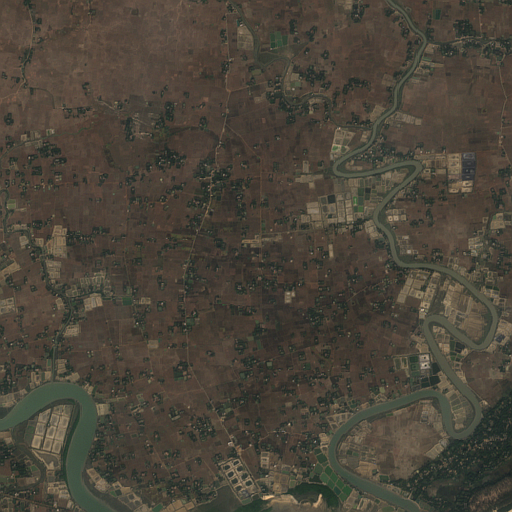

In [14]:
coords_ = [87.09399599999999,21.518987600000003,87.140996,21.5659876]
img_true = sentinel_request(evalscript_true_color, coords_,slots[0], config, False, '../data/junk_photos_sentine_hub', other_args=no_clouds)
im = Image.fromarray(img_true)
enhancer = ImageEnhance.Sharpness(im)
im_s_1 = enhancer.enhance(2)
im_s_1

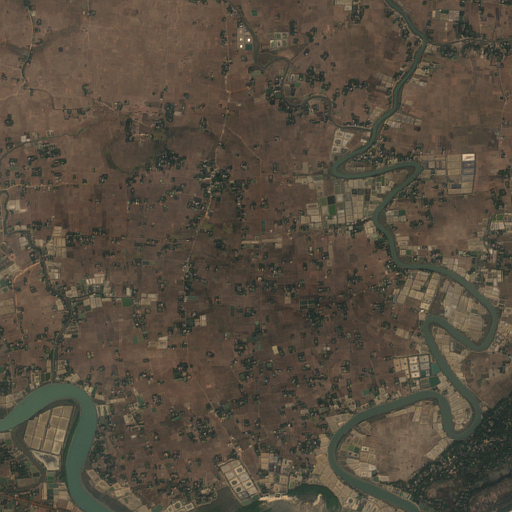

In [15]:
img_true = sentinel_request(evalscript_true_color, coords_,slots[1], config, False, '../data/junk_photos_sentine_hub', other_args=no_clouds)
im = Image.fromarray(img_true)
enhancer = ImageEnhance.Sharpness(im)
im_s_1 = enhancer.enhance(2)
im_s_1